In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

## S 11

In [77]:
S11_data = pd.read_csv('Data/Subject_11/S_11_PMBR_runs.csv')

In [78]:
S11_data[S11_data['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()

Block
1     0.446863
2     0.501684
3     0.508048
4     0.456686
5     0.388367
6     0.398615
7     0.487585
8     0.421318
9     0.384517
10    0.443298
11    0.364848
12    0.413222
13    0.443854
14    0.366760
15    0.356658
16    0.463411
17    0.401737
18    0.450140
19    0.394297
20    0.380700
Name: RT_start_right, dtype: float64

In [79]:
S11_data[S11_data['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

Block
1     0.439636
2     0.454770
3     0.486486
4     0.415437
5     0.336133
6     0.332145
7     0.319904
8     0.291309
9     0.307867
10    0.346455
11    0.332713
12    0.340150
13    0.350761
14    0.312092
15    0.340055
16    0.334600
17    0.394240
18    0.358240
19    0.353883
20    0.308682
Name: RT_start_left, dtype: float64

In [80]:
diff_S11_data=S11_data[S11_data['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-S11_data[S11_data['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\3611345199.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S11_data.index, y=diff_S11_data.values, ci='sd', markers='o', linestyles='-', color='blue')


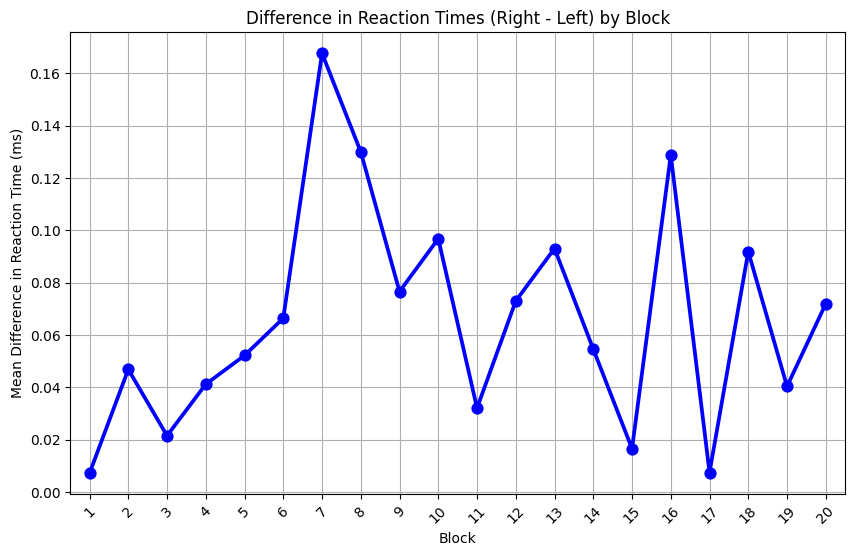

In [81]:
#plot diff_S11_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S11_data.index, y=diff_S11_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.grid(True)

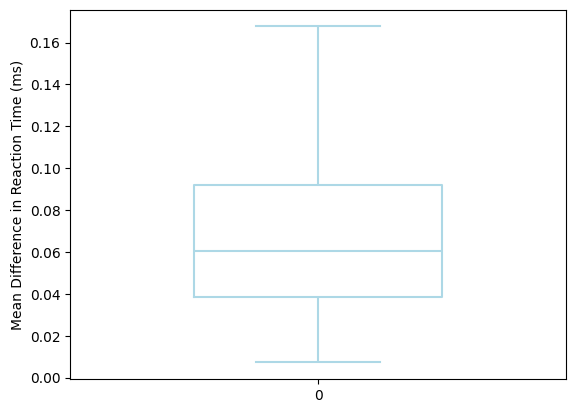

In [82]:
sns.boxplot(x=0, y=diff_S11_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

### Valid S11_data

In [83]:
valid_S11_data = S11_data[(S11_data['RT_start_right']>0.1) | (S11_data['RT_start_left']>0.1)]
valid_S11_data_right = valid_S11_data[valid_S11_data['RT_start_right']>0.1]
valid_S11_data_left = valid_S11_data[valid_S11_data['RT_start_left']>0.1]

In [84]:
#exclude outliers
q1_right = valid_S11_data_right['RT_start_right'].quantile(0.25)
q3_right = valid_S11_data_right['RT_start_right'].quantile(0.75)
iqr_right = q3_right - q1_right
lower_bound_right = q1_right - 1.5 * iqr_right
upper_bound_right = q3_right + 1.5 * iqr_right
valid_S11_data_right = valid_S11_data_right[(valid_S11_data_right['RT_start_right'] >= lower_bound_right) & (valid_S11_data_right['RT_start_right'] <= upper_bound_right)]

q1_left = valid_S11_data_left['RT_start_left'].quantile(0.25)
q3_left = valid_S11_data_left['RT_start_left'].quantile(0.75)
iqr_left = q3_left - q1_left
lower_bound_left = q1_left - 1.5 * iqr_left
upper_bound_left = q3_left + 1.5 * iqr_left
valid_S11_data_left = valid_S11_data_left[(valid_S11_data_left['RT_start_left'] >= lower_bound_left) & (valid_S11_data_left['RT_start_left'] <= upper_bound_left)]

In [85]:
diff_S11_data=valid_S11_data_right[valid_S11_data_right['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-valid_S11_data_left[valid_S11_data_left['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\2165144888.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S11_data.index, y=diff_S11_data.values, ci='sd', markers='o', linestyles='-', color='blue')


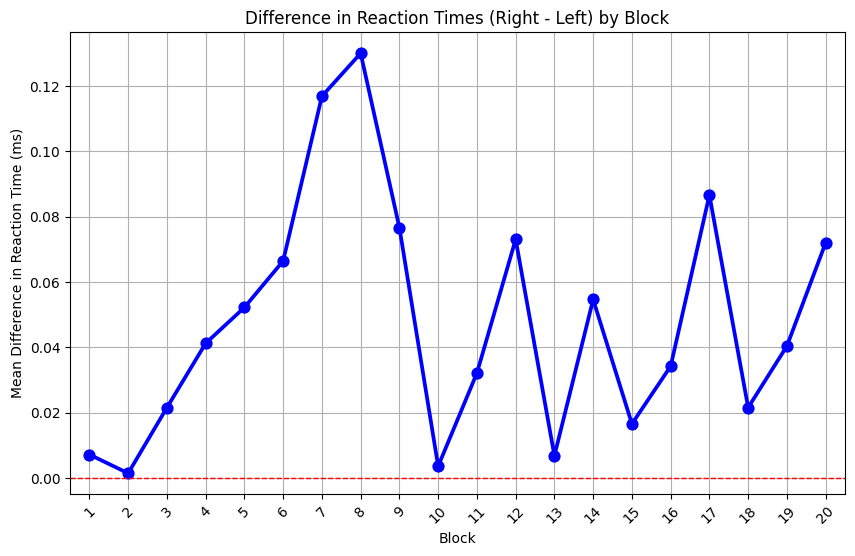

In [86]:
#plot diff_S11_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S11_data.index, y=diff_S11_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.grid(True)

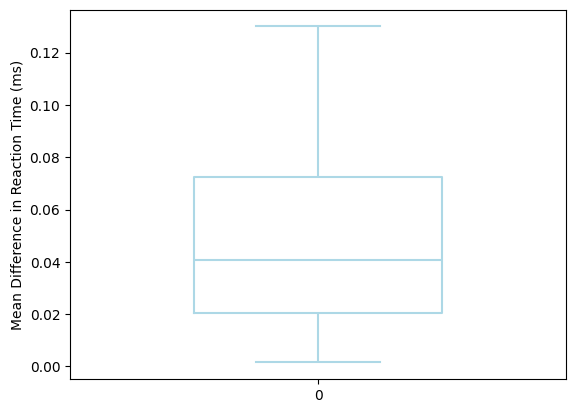

In [87]:
sns.boxplot(x=0, y=diff_S11_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## Reaction time movement end

In [88]:
diff_S11_RT_end_data=S11_data[S11_data['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-S11_data[S11_data['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()

In [89]:
valid_S11_RT_end_data = S11_data[(S11_data['RT_end_right']>0.1) | (S11_data['RT_end_left']>0.1)]
valid_S11_RT_end_data_right = valid_S11_RT_end_data[valid_S11_RT_end_data['RT_end_right']>0.1]
valid_S11_RT_end_data_left = valid_S11_RT_end_data[valid_S11_RT_end_data['RT_end_left']>0.1]

#exclude outliers
q1_RT_end_right = valid_S11_RT_end_data_right['RT_end_right'].quantile(0.25)
q3_RT_end_right = valid_S11_RT_end_data_right['RT_end_right'].quantile(0.75)
iqr_RT_end_right = q3_RT_end_right - q1_RT_end_right
lower_bound_RT_end_right = q1_RT_end_right - 1.5 * iqr_RT_end_right
upper_bound_RT_end_right = q3_RT_end_right + 1.5 * iqr_RT_end_right
valid_S11_RT_end_data_right = valid_S11_RT_end_data_right[(valid_S11_RT_end_data_right['RT_end_right'] >= lower_bound_RT_end_right) & (valid_S11_RT_end_data_right['RT_end_right'] <= upper_bound_RT_end_right)]
q1_RT_end_left = valid_S11_RT_end_data_left['RT_end_left'].quantile(0.25)
q3_RT_end_left = valid_S11_RT_end_data_left['RT_end_left'].quantile(0.75)
iqr_RT_end_left = q3_RT_end_left - q1_RT_end_left
lower_bound_RT_end_left = q1_RT_end_left - 1.5 * iqr_RT_end_left
upper_bound_RT_end_left = q3_RT_end_left + 1.5 * iqr_RT_end_left
valid_S11_RT_end_data_left = valid_S11_RT_end_data_left[(valid_S11_RT_end_data_left['RT_end_left'] >= lower_bound_RT_end_left) & (valid_S11_RT_end_data_left['RT_end_left'] <= upper_bound_RT_end_left)]

diff_S11_RT_end_data=valid_S11_RT_end_data_right[valid_S11_RT_end_data_right['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-valid_S11_RT_end_data_left[valid_S11_RT_end_data_left['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\4145060562.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S11_RT_end_data.index, y=diff_S11_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')


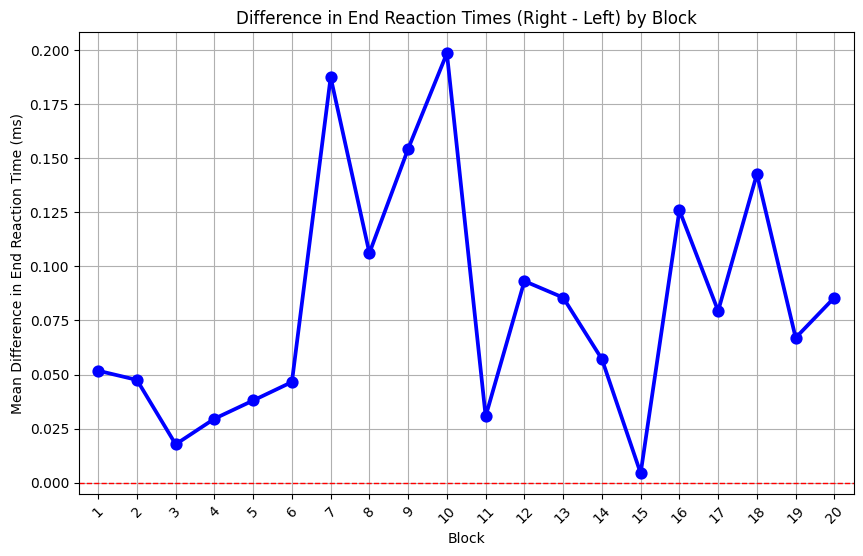

In [90]:
# plot diff_S11_RT_end_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S11_RT_end_data.index, y=diff_S11_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in End Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in End Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)


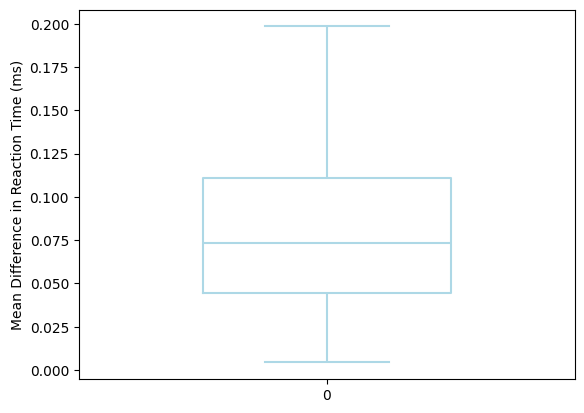

In [91]:
sns.boxplot(x=0, y=diff_S11_RT_end_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## S12

In [92]:
S12_data = pd.read_csv('Data/Subject_12/S_12_PMBR_runs.csv')

In [93]:
S12_data[S12_data['RT_start_right']>0].groupby('Block')['RT_start_right'].mean()

Block
1     0.514590
2     0.649547
3     0.315303
4     0.506147
5     0.501937
6     0.494434
7     0.256431
8     0.368084
9     0.662641
10    0.345957
11    0.423063
12    0.524265
13    0.842760
14    0.346141
15    0.463160
16    0.473032
17    0.565786
18    0.489055
19    0.521874
20    0.516752
Name: RT_start_right, dtype: float64

In [94]:
S12_data[S12_data['RT_start_left']>0].groupby('Block')['RT_start_left'].mean()

Block
1     0.448630
2     0.497568
3     0.749424
4     0.456015
5     0.449054
6     0.463408
7     0.441536
8     0.590028
9     0.435637
10    0.423212
11    0.483714
12    0.434510
13    0.468376
14    0.490397
15    0.490246
16    0.460410
17    0.436005
18    0.461441
19    0.406470
20    0.514924
Name: RT_start_left, dtype: float64

In [95]:
valid_S12_data = S12_data[(S12_data['RT_start_right']>0.1) | (S12_data['RT_start_left']>0.1)]

In [96]:
valid_S12_data_right = valid_S12_data[valid_S12_data['RT_start_right']>0.1]
valid_S12_data_left = valid_S12_data[valid_S12_data['RT_start_left']>0.1]

In [97]:
#exclude outliers
q1_right = valid_S12_data_right['RT_start_right'].quantile(0.25)
q3_right = valid_S12_data_right['RT_start_right'].quantile(0.75)
iqr_right = q3_right - q1_right
lower_bound_right = q1_right - 1.5 * iqr_right
upper_bound_right = q3_right + 1.5 * iqr_right
valid_S12_data_right = valid_S12_data_right[(valid_S12_data_right['RT_start_right'] >= lower_bound_right) & (valid_S12_data_right['RT_start_right'] <= upper_bound_right)]

q1_left = valid_S12_data_left['RT_start_left'].quantile(0.25)
q3_left = valid_S12_data_left['RT_start_left'].quantile(0.75)
iqr_left = q3_left - q1_left
lower_bound_left = q1_left - 1.5 * iqr_left
upper_bound_left = q3_left + 1.5 * iqr_left
valid_S12_data_left = valid_S12_data_left[(valid_S12_data_left['RT_start_left'] >= lower_bound_left) & (valid_S12_data_left['RT_start_left'] <= upper_bound_left)]

In [98]:
diff_S12_data=valid_S12_data_right[valid_S12_data_right['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-valid_S12_data_left[valid_S12_data_left['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\2465819520.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S12_data.index, y=diff_S12_data.values, ci='sd', markers='o', linestyles='-', color='blue')


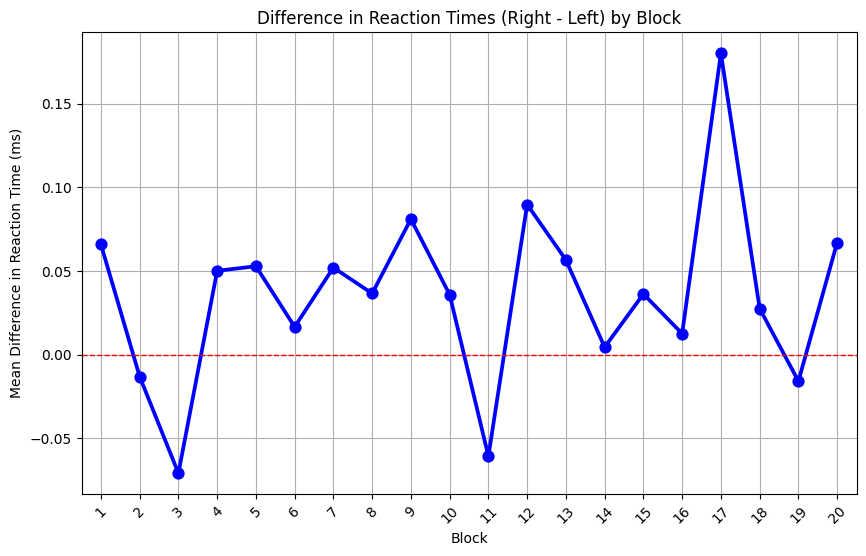

In [99]:
#plot diff_S12_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S12_data.index, y=diff_S12_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

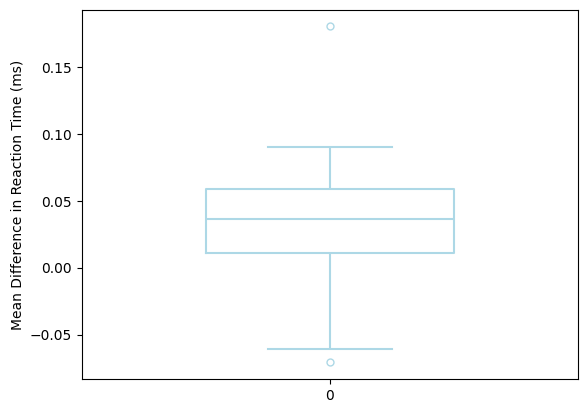

In [100]:
sns.boxplot(x=0, y=diff_S12_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## RT end

In [101]:
diff_S12_RT_end_data=S12_data[S12_data['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-S12_data[S12_data['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()
valid_S12_RT_end_data = S12_data[(S12_data['RT_end_right']>0.1) | (S12_data['RT_end_left']>0.1)]
valid_S12_RT_end_data_right = valid_S12_RT_end_data[valid_S12_RT_end_data['RT_end_right']>0.1]
valid_S12_RT_end_data_left = valid_S12_RT_end_data[valid_S12_RT_end_data['RT_end_left']>0.1]
#exclude outliers
q1_RT_end_right = valid_S12_RT_end_data_right['RT_end_right'].quantile(0.25)
q3_RT_end_right = valid_S12_RT_end_data_right['RT_end_right'].quantile(0.75)
iqr_RT_end_right = q3_RT_end_right - q1_RT_end_right
lower_bound_RT_end_right = q1_RT_end_right - 1.5 * iqr_RT_end_right
upper_bound_RT_end_right = q3_RT_end_right + 1.5 * iqr_RT_end_right
valid_S12_RT_end_data_right = valid_S12_RT_end_data_right[(valid_S12_RT_end_data_right['RT_end_right'] >= lower_bound_RT_end_right) & (valid_S12_RT_end_data_right['RT_end_right'] <= upper_bound_RT_end_right)]
q1_RT_end_left = valid_S12_RT_end_data_left['RT_end_left'].quantile(0.25)
q3_RT_end_left = valid_S12_RT_end_data_left['RT_end_left'].quantile(0.75)
iqr_RT_end_left = q3_RT_end_left - q1_RT_end_left
lower_bound_RT_end_left = q1_RT_end_left - 1.5 * iqr_RT_end_left
upper_bound_RT_end_left = q3_RT_end_left + 1.5 * iqr_RT_end_left
valid_S12_RT_end_data_left = valid_S12_RT_end_data_left[(valid_S12_RT_end_data_left['RT_end_left'] >= lower_bound_RT_end_left) & (valid_S12_RT_end_data_left['RT_end_left'] <= upper_bound_RT_end_left)]

diff_S12_RT_end_data=valid_S12_RT_end_data_right[valid_S12_RT_end_data_right['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-valid_S12_RT_end_data_left[valid_S12_RT_end_data_left['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()


C:\Users\defon\AppData\Local\Temp\ipykernel_29312\3746719019.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S12_RT_end_data.index, y=diff_S12_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')


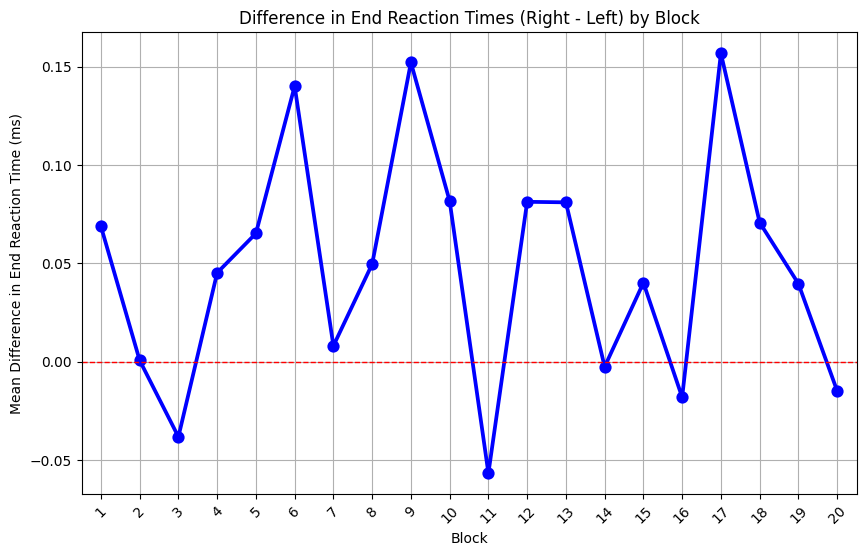

In [102]:
#plot diff_S12_RT_end_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S12_RT_end_data.index, y=diff_S12_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in End Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in End Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

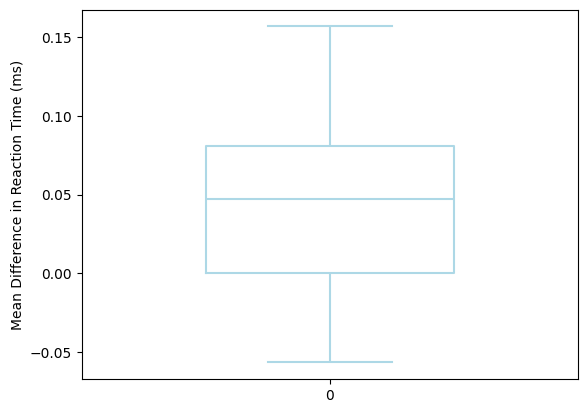

In [103]:
sns.boxplot(x=0, y=diff_S12_RT_end_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## S13

In [104]:
S13_data = pd.read_csv('Data/Subject_13/S_13_PMBR_runs.csv')

In [105]:
S13_data[S13_data['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()

Block
1     0.556660
2     0.514661
3     0.454608
4     0.469920
5     0.498522
6     0.391429
7     0.425454
8     0.429492
9     0.369313
10    0.439112
11    0.375557
12    0.355323
13    0.419286
14    0.358951
15    0.380922
16    0.745384
17    0.367387
18    0.310950
19    0.483233
20    0.345758
Name: RT_start_right, dtype: float64

In [106]:
S13_data[S13_data['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

Block
1     0.540352
2     0.562072
3     0.450414
4     0.432669
5     0.456921
6     0.471707
7     0.413132
8     0.385314
9     0.409048
10    0.447540
11    0.362486
12    0.363525
13    0.368706
14    0.319846
15    0.385073
16    0.405230
17    0.300228
18    0.299100
19    0.332043
20    0.328039
Name: RT_start_left, dtype: float64

In [107]:
valid_S13_data = S13_data[(S13_data['RT_start_right']>0.1) | (S13_data['RT_start_left']>0.1)]

In [108]:
valid_S13_data_right = valid_S13_data[valid_S13_data['RT_start_right']>0.1]
valid_S13_data_left = valid_S13_data[valid_S13_data['RT_start_left']>0.1]

In [109]:
#exclude outliers
q1_right = valid_S13_data_right['RT_start_right'].quantile(0.25)
q3_right = valid_S13_data_right['RT_start_right'].quantile(0.75)
iqr_right = q3_right - q1_right
lower_bound_right = q1_right - 1.5 * iqr_right
upper_bound_right = q3_right + 1.5 * iqr_right
valid_S13_data_right = valid_S13_data_right[(valid_S13_data_right['RT_start_right'] >= lower_bound_right) & (valid_S13_data_right['RT_start_right'] <= upper_bound_right)]

q1_left = valid_S13_data_left['RT_start_left'].quantile(0.25)
q3_left = valid_S13_data_left['RT_start_left'].quantile(0.75)
iqr_left = q3_left - q1_left
lower_bound_left = q1_left - 1.5 * iqr_left
upper_bound_left = q3_left + 1.5 * iqr_left
valid_S13_data_left = valid_S13_data_left[(valid_S13_data_left['RT_start_left'] >= lower_bound_left) & (valid_S13_data_left['RT_start_left'] <= upper_bound_left)]

In [110]:
diff_S13_data=valid_S13_data_right[valid_S13_data_right['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-valid_S13_data_left[valid_S13_data_left['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\1994761015.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S13_data.index, y=diff_S13_data.values, ci='sd', markers='o', linestyles='-', color='blue')


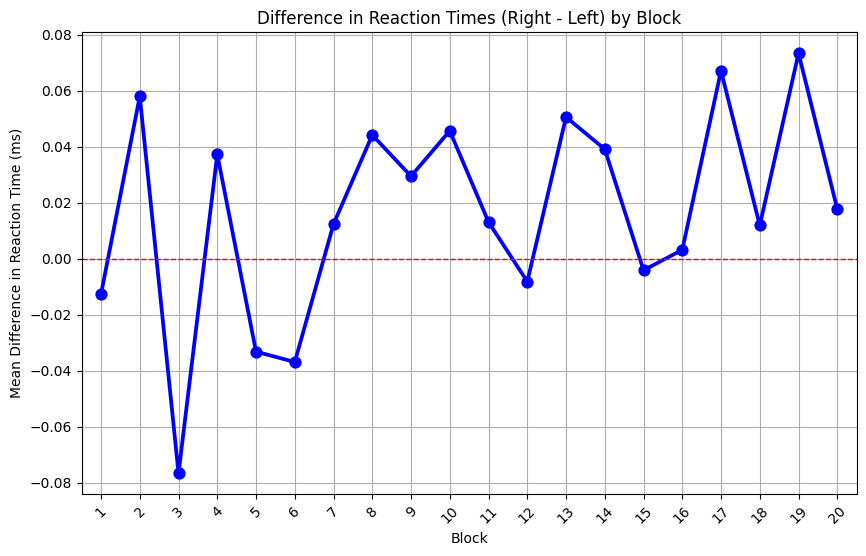

In [111]:
#plot diff_S12_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S13_data.index, y=diff_S13_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

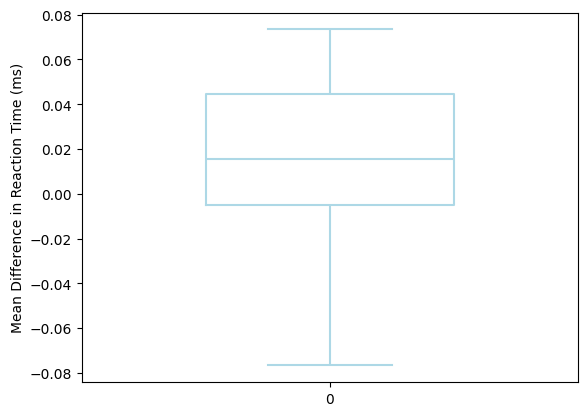

In [112]:
sns.boxplot(x=0, y=diff_S13_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## rt_end

In [113]:
diff_S13_RT_end_data=S13_data[S13_data['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-S13_data[S13_data['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()
valid_S13_RT_end_data = S13_data[(S13_data['RT_end_right']>0.1) | (S13_data['RT_end_left']>0.1)]
valid_S13_RT_end_data_right = valid_S13_RT_end_data[valid_S13_RT_end_data['RT_end_right']>0.1]
valid_S13_RT_end_data_left = valid_S13_RT_end_data[valid_S13_RT_end_data['RT_end_left']>0.1]
#exclude outliers       
q1_RT_end_right = valid_S13_RT_end_data_right['RT_end_right'].quantile(0.25)
q3_RT_end_right = valid_S13_RT_end_data_right['RT_end_right'].quantile(0.75)
iqr_RT_end_right = q3_RT_end_right - q1_RT_end_right        
lower_bound_RT_end_right = q1_RT_end_right - 1.5 * iqr_RT_end_right
upper_bound_RT_end_right = q3_RT_end_right + 1.5 * iqr_RT_end_right
valid_S13_RT_end_data_right = valid_S13_RT_end_data_right[(valid_S13_RT_end_data_right['RT_end_right'] >= lower_bound_RT_end_right) & (valid_S13_RT_end_data_right['RT_end_right'] <= upper_bound_RT_end_right)]
q1_RT_end_left = valid_S13_RT_end_data_left['RT_end_left'].quantile(0.25)
q3_RT_end_left = valid_S13_RT_end_data_left['RT_end_left'].quantile(0.75)
iqr_RT_end_left = q3_RT_end_left - q1_RT_end_left   
lower_bound_RT_end_left = q1_RT_end_left - 1.5 * iqr_RT_end_left
upper_bound_RT_end_left = q3_RT_end_left + 1.5 * iqr_RT_end_left
valid_S13_RT_end_data_left = valid_S13_RT_end_data_left[(valid_S13_RT_end_data_left['RT_end_left'] >= lower_bound_RT_end_left) & (valid_S13_RT_end_data_left['RT_end_left'] <= upper_bound_RT_end_left)]    

diff_S13_RT_end_data=valid_S13_RT_end_data_right[valid_S13_RT_end_data_right['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-valid_S13_RT_end_data_left[valid_S13_RT_end_data_left['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\629199774.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S13_RT_end_data.index, y=diff_S13_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')


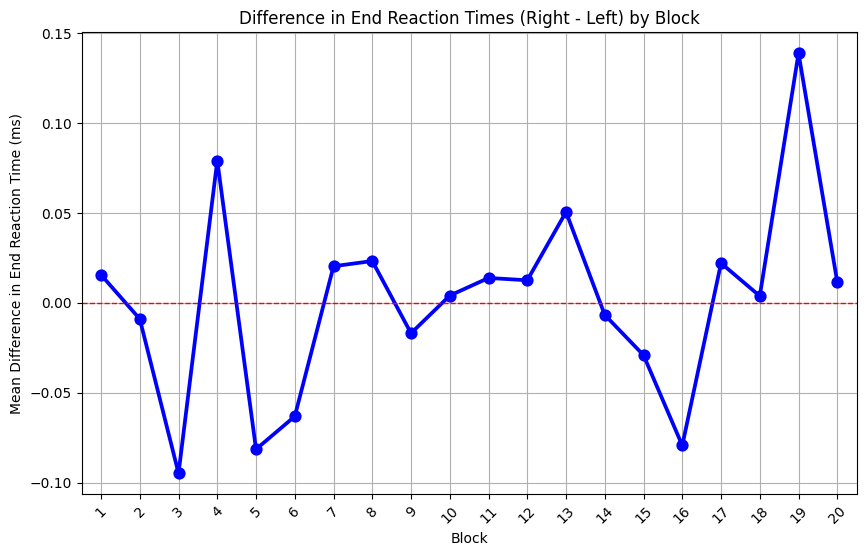

In [114]:
#plot diff_S12_RT_end_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S13_RT_end_data.index, y=diff_S13_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in End Reaction Times (Right - Left) by Block')       
plt.xlabel('Block')
plt.ylabel('Mean Difference in End Reaction Time (ms)') 
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

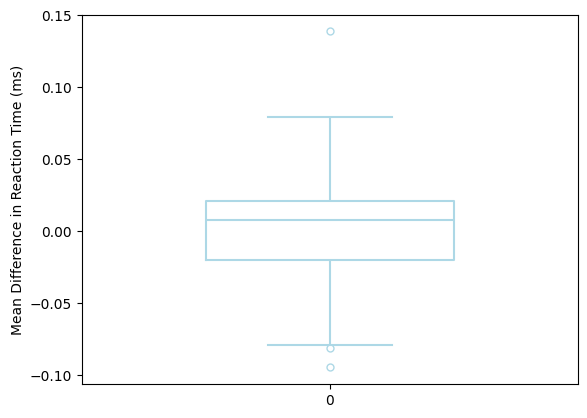

In [115]:
sns.boxplot(x=0, y=diff_S13_RT_end_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## S14

In [116]:
S14_data = pd.read_csv('Data/Subject_14/S_14_PMBR_runs.csv')

In [117]:
S14_data[S14_data['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()

Block
1     0.464770
2     0.428714
3     0.468860
4     0.506278
5     0.441081
6     0.487365
7     0.536484
8     0.468824
9     0.476060
10    0.474048
11    0.501051
12    0.449628
13    0.477554
14    0.485882
15    0.554740
16    0.374485
17    0.378400
18    0.344538
19    0.444372
20    0.353525
Name: RT_start_right, dtype: float64

In [118]:
S14_data[S14_data['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

Block
1     0.595416
2     0.481620
3     0.421363
4     0.410204
5     0.504592
6     0.510808
7     0.501795
8     0.527026
9     0.493896
10    0.500220
11    0.509230
12    0.450466
13    0.500842
14    0.658450
15    0.446163
16    0.385391
17    0.341194
18    0.360904
19    0.379405
20    0.363460
Name: RT_start_left, dtype: float64

In [119]:
valid_S14_data = S14_data[(S14_data['RT_start_right']>0.1) | (S14_data['RT_start_left']>0.1)]

In [120]:
valid_S14_data_right = valid_S14_data[valid_S14_data['RT_start_right']>0.1]
valid_S14_data_left = valid_S14_data[valid_S14_data['RT_start_left']>0.1]

In [121]:
#exclude outliers
q1_right = valid_S14_data_right['RT_start_right'].quantile(0.25)
q3_right = valid_S14_data_right['RT_start_right'].quantile(0.75)
iqr_right = q3_right - q1_right
lower_bound_right = q1_right - 1.5 * iqr_right
upper_bound_right = q3_right + 1.5 * iqr_right
valid_S14_data_right = valid_S14_data_right[(valid_S14_data_right['RT_start_right'] >= lower_bound_right) & (valid_S14_data_right['RT_start_right'] <= upper_bound_right)]

q1_left = valid_S14_data_left['RT_start_left'].quantile(0.25)
q3_left = valid_S14_data_left['RT_start_left'].quantile(0.75)
iqr_left = q3_left - q1_left
lower_bound_left = q1_left - 1.5 * iqr_left
upper_bound_left = q3_left + 1.5 * iqr_left
valid_S14_data_left = valid_S14_data_left[(valid_S14_data_left['RT_start_left'] >= lower_bound_left) & (valid_S14_data_left['RT_start_left'] <= upper_bound_left)]

In [122]:
diff_S14_data=valid_S14_data_right[valid_S14_data_right['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-valid_S14_data_left[valid_S14_data_left['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\1906711370.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S14_data.index, y=diff_S14_data.values, ci='sd', markers='o', linestyles='-', color='blue')


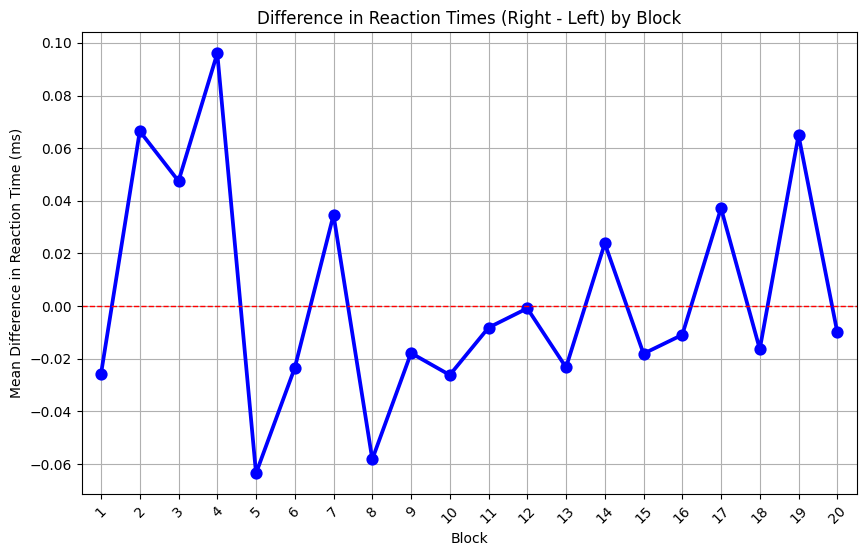

In [123]:
#plot diff_S12_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S14_data.index, y=diff_S14_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

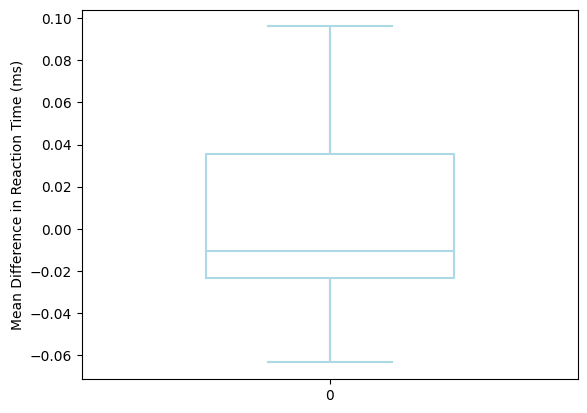

In [124]:
sns.boxplot(x=0, y=diff_S14_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## RT end

In [125]:
diff_S14_RT_end_data=S14_data[S14_data['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-S14_data[S14_data['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()
valid_S14_RT_end_data = S14_data[(S14_data['RT_end_right']>0.1) | (S14_data['RT_end_left']>0.1)]
valid_S14_RT_end_data_right = valid_S14_RT_end_data[valid_S14_RT_end_data['RT_end_right']>0.1]
valid_S14_RT_end_data_left = valid_S14_RT_end_data[valid_S14_RT_end_data['RT_end_left']>0.1]
#exclude outliers   
q1_RT_end_right = valid_S14_RT_end_data_right['RT_end_right'].quantile(0.25)
q3_RT_end_right = valid_S14_RT_end_data_right['RT_end_right'].quantile(0.75)
iqr_RT_end_right = q3_RT_end_right - q1_RT_end_right    
lower_bound_RT_end_right = q1_RT_end_right - 1.5 * iqr_RT_end_right
upper_bound_RT_end_right = q3_RT_end_right + 1.5 * iqr_RT_end_right
valid_S14_RT_end_data_right = valid_S14_RT_end_data_right[(valid_S14_RT_end_data_right['RT_end_right'] >= lower_bound_RT_end_right) & (valid_S14_RT_end_data_right['RT_end_right'] <= upper_bound_RT_end_right)]
q1_RT_end_left = valid_S14_RT_end_data_left['RT_end_left'].quantile(0.25)
q3_RT_end_left = valid_S14_RT_end_data_left['RT_end_left'].quantile(0.75)
iqr_RT_end_left = q3_RT_end_left - q1_RT_end_left   
lower_bound_RT_end_left = q1_RT_end_left - 1.5 * iqr_RT_end_left
upper_bound_RT_end_left = q3_RT_end_left + 1.5 * iqr_RT_end_left
valid_S14_RT_end_data_left = valid_S14_RT_end_data_left[(valid_S14_RT_end_data_left['RT_end_left'] >= lower_bound_RT_end_left) & (valid_S14_RT_end_data_left['RT_end_left'] <= upper_bound_RT_end_left)]    

diff_S14_RT_end_data=valid_S14_RT_end_data_right[valid_S14_RT_end_data_right['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-valid_S14_RT_end_data_left[valid_S14_RT_end_data_left['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\272402309.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S14_RT_end_data.index, y=diff_S14_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')


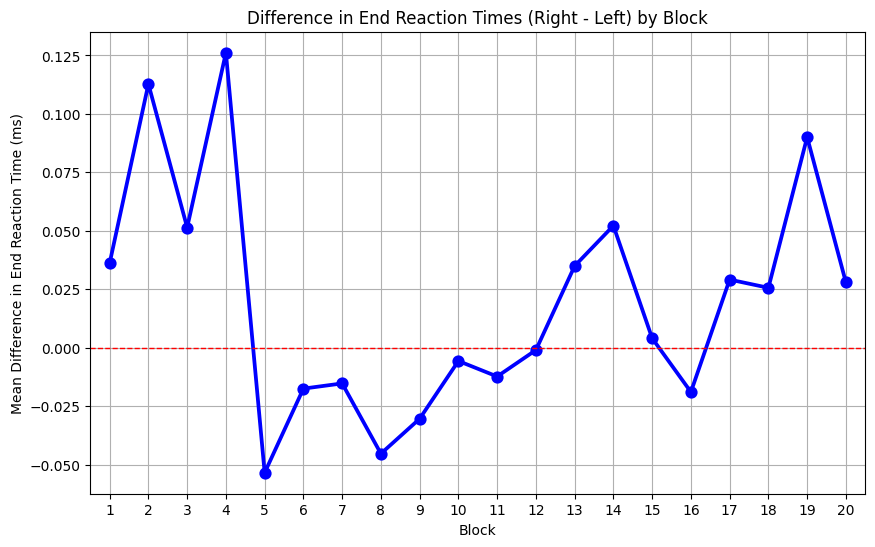

In [126]:
#plot diff by block
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S14_RT_end_data.index, y=diff_S14_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in End Reaction Times (Right - Left) by Block')   
plt.xlabel('Block')
plt.ylabel('Mean Difference in End Reaction Time (ms)')   
plt.axhline(0, color='red', linestyle='--', linewidth=1)  
plt.grid(True)

## S15

In [127]:
S15_data = pd.read_csv('Data/Subject_15/S_15_PMBR_runs.csv')

In [128]:
S15_data[S15_data['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()

Block
1     0.472156
2     0.504779
3     0.466949
4     1.076126
5     0.465031
6     0.424720
7     0.450292
8     0.423025
9     0.445673
10    0.440352
11    0.487810
12    0.399174
13    0.427169
14    0.456452
15    0.540314
16    0.388425
17    0.449226
18    0.405264
19    0.378153
20    0.283575
Name: RT_start_right, dtype: float64

In [129]:
S15_data[S15_data['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

Block
1     0.432046
2     0.473696
3     0.455486
4     0.434281
5     0.727797
6     0.404331
7     0.417028
8     0.432708
9     0.480760
10    0.412144
11    0.540688
12    0.478487
13    0.413059
14    0.415548
15    0.410918
16    0.369282
17    0.444072
18    0.410299
19    0.363323
20    0.449429
Name: RT_start_left, dtype: float64

In [130]:
valid_S15_data = S15_data[(S15_data['RT_start_right']>0.1) | (S15_data['RT_start_left']>0.1)]

In [131]:
valid_S15_data_right = valid_S15_data[valid_S15_data['RT_start_right']>0.1]
valid_S15_data_left = valid_S15_data[valid_S15_data['RT_start_left']>0.1]

In [132]:
#exclude outliers
q1_right = valid_S15_data_right['RT_start_right'].quantile(0.25)
q3_right = valid_S15_data_right['RT_start_right'].quantile(0.75)
iqr_right = q3_right - q1_right
lower_bound_right = q1_right - 1.5 * iqr_right
upper_bound_right = q3_right + 1.5 * iqr_right
valid_S15_data_right = valid_S15_data_right[(valid_S15_data_right['RT_start_right'] >= lower_bound_right) & (valid_S15_data_right['RT_start_right'] <= upper_bound_right)]

q1_left = valid_S15_data_left['RT_start_left'].quantile(0.25)
q3_left = valid_S15_data_left['RT_start_left'].quantile(0.75)
iqr_left = q3_left - q1_left
lower_bound_left = q1_left - 1.5 * iqr_left
upper_bound_left = q3_left + 1.5 * iqr_left
valid_S15_data_left = valid_S15_data_left[(valid_S15_data_left['RT_start_left'] >= lower_bound_left) & (valid_S15_data_left['RT_start_left'] <= upper_bound_left)]

In [133]:
diff_S15_data=valid_S15_data_right[valid_S15_data_right['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-valid_S15_data_left[valid_S15_data_left['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\3541135811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S15_data.index, y=diff_S15_data.values, ci='sd', markers='o', linestyles='-', color='blue')


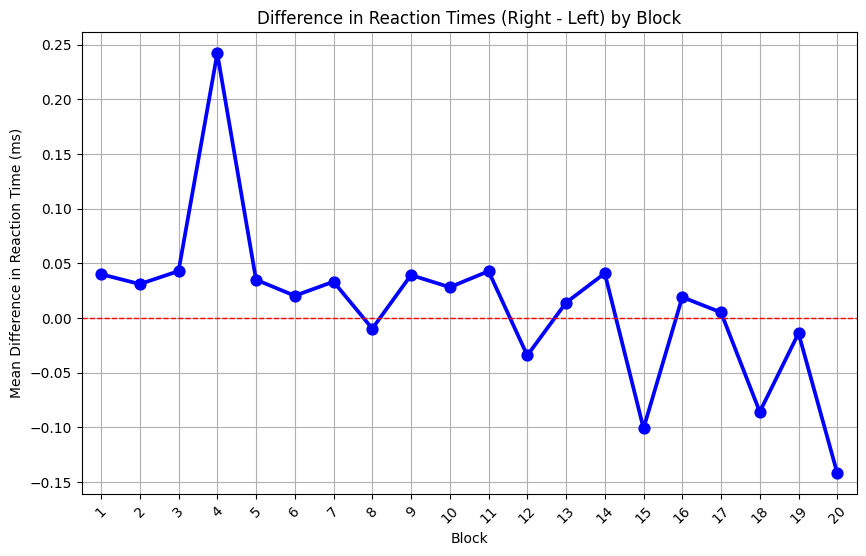

In [134]:
#plot diff_S12_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S15_data.index, y=diff_S15_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

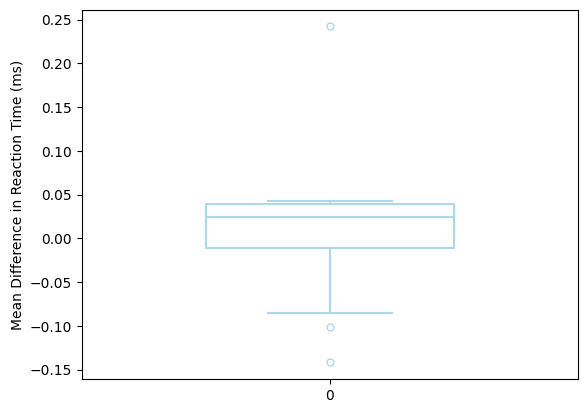

In [135]:
sns.boxplot(x=0, y=diff_S15_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()

## RT end

In [136]:
diff_S15_RT_end_data=S15_data[S15_data['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-S15_data[S15_data['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()
valid_S15_RT_end_data = S15_data[(S15_data['RT_end_right']>0.1) | (S15_data['RT_end_left']>0.1)]
valid_S15_RT_end_data_right = valid_S15_RT_end_data[valid_S15_RT_end_data['RT_end_right']>0.1]
valid_S15_RT_end_data_left = valid_S15_RT_end_data[valid_S15_RT_end_data['RT_end_left']>0.1]
#exclude outliers   
q1_RT_end_right = valid_S15_RT_end_data_right['RT_end_right'].quantile(0.25)
q3_RT_end_right = valid_S15_RT_end_data_right['RT_end_right'].quantile(0.75)
iqr_RT_end_right = q3_RT_end_right - q1_RT_end_right    
lower_bound_RT_end_right = q1_RT_end_right - 1.5 * iqr_RT_end_right
upper_bound_RT_end_right = q3_RT_end_right + 1.5 * iqr_RT_end_right
valid_S15_RT_end_data_right = valid_S15_RT_end_data_right[(valid_S15_RT_end_data_right['RT_end_right'] >= lower_bound_RT_end_right) & (valid_S15_RT_end_data_right['RT_end_right'] <= upper_bound_RT_end_right)]
q1_RT_end_left = valid_S15_RT_end_data_left['RT_end_left'].quantile(0.25)
q3_RT_end_left = valid_S15_RT_end_data_left['RT_end_left'].quantile(0.75)
iqr_RT_end_left = q3_RT_end_left - q1_RT_end_left   
lower_bound_RT_end_left = q1_RT_end_left - 1.5 * iqr_RT_end_left
upper_bound_RT_end_left = q3_RT_end_left + 1.5 * iqr_RT_end_left
valid_S15_RT_end_data_left = valid_S15_RT_end_data_left[(valid_S15_RT_end_data_left['RT_end_left'] >= lower_bound_RT_end_left) & (valid_S15_RT_end_data_left['RT_end_left'] <= upper_bound_RT_end_left)]    

diff_S15_RT_end_data=valid_S15_RT_end_data_right[valid_S15_RT_end_data_right['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-valid_S15_RT_end_data_left[valid_S15_RT_end_data_left['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\1087166260.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S15_RT_end_data.index, y=diff_S15_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')


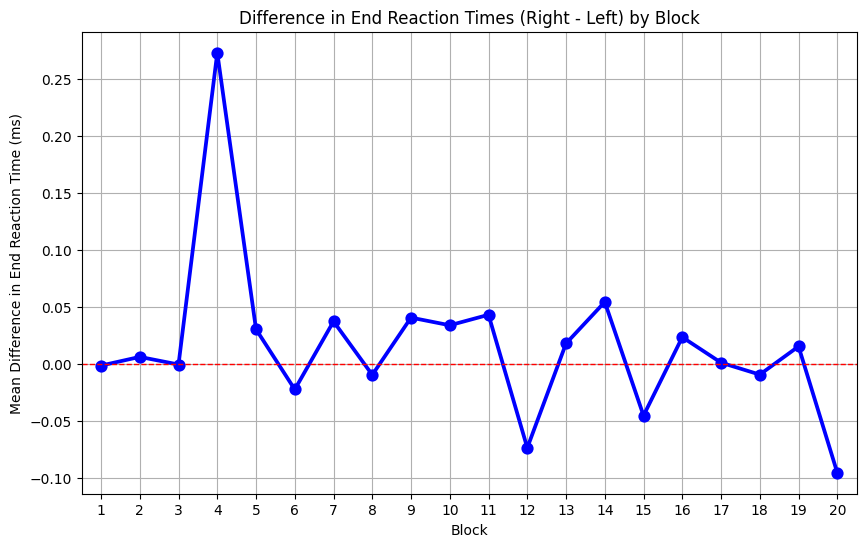

In [137]:
#plot diff by block
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S15_RT_end_data.index, y=diff_S15_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in End Reaction Times (Right - Left) by Block')   
plt.xlabel('Block')
plt.ylabel('Mean Difference in End Reaction Time (ms)')   
plt.axhline(0, color='red', linestyle='--', linewidth=1)  
plt.grid(True)

## S16

In [159]:
S16_data = pd.read_csv('Data/Subject_16/S_16_PMBR_runs.csv')

In [160]:
S16_data[S16_data['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()

Block
1     0.589525
2     0.561162
3     0.452931
4     0.465138
5     0.464378
6     0.460237
7     1.027190
8     0.456954
9     0.436870
10    0.427539
11    0.481941
12    0.444315
13    0.459434
14    0.839179
15    0.364787
16    0.433625
17    0.437374
18    0.440333
19    0.640964
20    0.419143
Name: RT_start_right, dtype: float64

In [161]:
S16_data[S16_data['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

Block
1     0.663367
2     0.557102
3     0.408156
4     0.517647
5     0.446499
6     0.430121
7     0.463709
8     0.393366
9     0.430866
10    0.426494
11    0.461158
12    0.455286
13    0.475988
14    0.427211
15    0.413817
16    0.501763
17    0.437268
18    0.380888
19    0.393276
20    0.490639
Name: RT_start_left, dtype: float64

In [162]:
valid_S16_data = S16_data[(S16_data['RT_start_right']>0.1) | (S16_data['RT_start_left']>0.1)]

In [163]:
valid_S16_data_right = valid_S16_data[valid_S16_data['RT_start_right']>0.1]
valid_S16_data_left = valid_S16_data[valid_S16_data['RT_start_left']>0.1]

In [164]:
#exclude outliers
q1_right = valid_S16_data_right['RT_start_right'].quantile(0.25)
q3_right = valid_S16_data_right['RT_start_right'].quantile(0.75)
iqr_right = q3_right - q1_right
lower_bound_right = q1_right - 1.5 * iqr_right
upper_bound_right = q3_right + 1.5 * iqr_right
valid_S16_data_right = valid_S16_data_right[(valid_S16_data_right['RT_start_right'] >= lower_bound_right) & (valid_S16_data_right['RT_start_right'] <= upper_bound_right)]

q1_left = valid_S16_data_left['RT_start_left'].quantile(0.25)
q3_left = valid_S16_data_left['RT_start_left'].quantile(0.75)
iqr_left = q3_left - q1_left
lower_bound_left = q1_left - 1.5 * iqr_left
upper_bound_left = q3_left + 1.5 * iqr_left
valid_S16_data_left = valid_S16_data_left[(valid_S16_data_left['RT_start_left'] >= lower_bound_left) & (valid_S16_data_left['RT_start_left'] <= upper_bound_left)]

In [165]:
diff_S16_data=valid_S16_data_right[valid_S16_data_right['RT_start_right']>0.1].groupby('Block')['RT_start_right'].mean()-valid_S16_data_left[valid_S16_data_left['RT_start_left']>0.1].groupby('Block')['RT_start_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\580553961.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S16_data.index, y=diff_S16_data.values, ci='sd', markers='o', linestyles='-', color='blue')


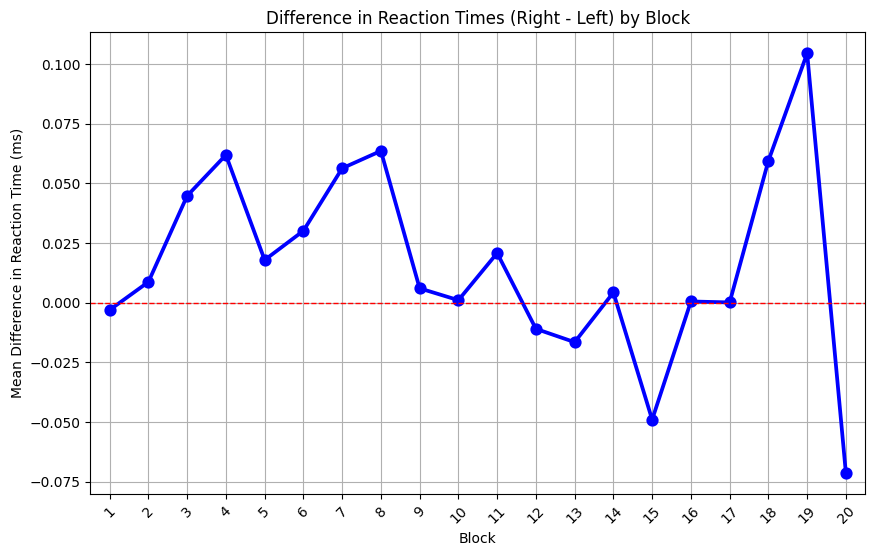

In [166]:
#plot diff_S12_data with the mean and std and each point shown
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S16_data.index, y=diff_S16_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in Reaction Times (Right - Left) by Block')
plt.xlabel('Block')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(True)

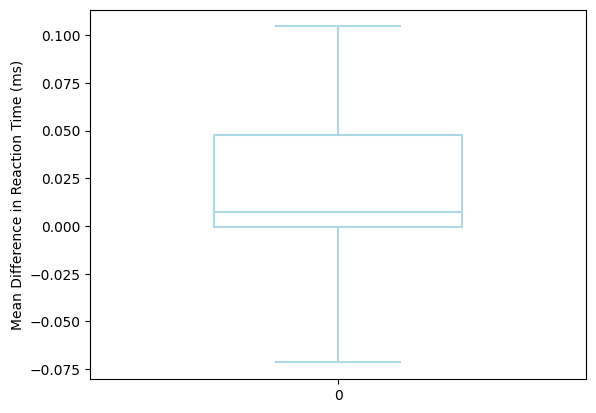

In [167]:
sns.boxplot(x=0, y=diff_S16_data.values, color='lightblue', fliersize=5, width=0.5, fill=False, linewidth=1.5)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.show()


## RT end

In [168]:
diff_S16_RT_end_data=S16_data[S16_data['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-S16_data[S16_data['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()
valid_S16_RT_end_data = S16_data[(S16_data['RT_end_right']>0.1) | (S16_data['RT_end_left']>0.1)]
valid_S16_RT_end_data_right = valid_S16_RT_end_data[valid_S16_RT_end_data['RT_end_right']>0.1]
valid_S16_RT_end_data_left = valid_S16_RT_end_data[valid_S16_RT_end_data['RT_end_left']>0.1]
#exclude outliers   
q1_RT_end_right = valid_S16_RT_end_data_right['RT_end_right'].quantile(0.25)
q3_RT_end_right = valid_S16_RT_end_data_right['RT_end_right'].quantile(0.75)
iqr_RT_end_right = q3_RT_end_right - q1_RT_end_right    
lower_bound_RT_end_right = q1_RT_end_right - 1.5 * iqr_RT_end_right
upper_bound_RT_end_right = q3_RT_end_right + 1.5 * iqr_RT_end_right
valid_S16_RT_end_data_right = valid_S16_RT_end_data_right[(valid_S16_RT_end_data_right['RT_end_right'] >= lower_bound_RT_end_right) & (valid_S16_RT_end_data_right['RT_end_right'] <= upper_bound_RT_end_right)]
q1_RT_end_left = valid_S16_RT_end_data_left['RT_end_left'].quantile(0.25)
q3_RT_end_left = valid_S16_RT_end_data_left['RT_end_left'].quantile(0.75)
iqr_RT_end_left = q3_RT_end_left - q1_RT_end_left   
lower_bound_RT_end_left = q1_RT_end_left - 1.5 * iqr_RT_end_left
upper_bound_RT_end_left = q3_RT_end_left + 1.5 * iqr_RT_end_left
valid_S16_RT_end_data_left = valid_S16_RT_end_data_left[(valid_S16_RT_end_data_left['RT_end_left'] >= lower_bound_RT_end_left) & (valid_S16_RT_end_data_left['RT_end_left'] <= upper_bound_RT_end_left)]    

diff_S16_RT_end_data=valid_S16_RT_end_data_right[valid_S16_RT_end_data_right['RT_end_right']>0.1].groupby('Block')['RT_end_right'].mean()-valid_S16_RT_end_data_left[valid_S16_RT_end_data_left['RT_end_left']>0.1].groupby('Block')['RT_end_left'].mean()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\3024327996.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=diff_S16_RT_end_data.index, y=diff_S16_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')


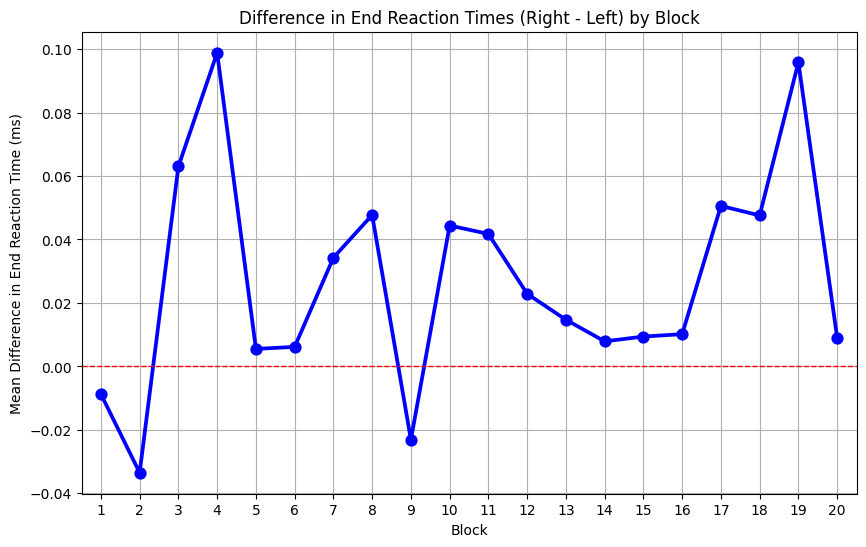

In [169]:
#plot diff by block
plt.figure(figsize=(10, 6))
sns.pointplot(x=diff_S16_RT_end_data.index, y=diff_S16_RT_end_data.values, ci='sd', markers='o', linestyles='-', color='blue')
plt.title('Difference in End Reaction Times (Right - Left) by Block')   
plt.xlabel('Block')
plt.ylabel('Mean Difference in End Reaction Time (ms)')   
plt.axhline(0, color='red', linestyle='--', linewidth=1)  
plt.grid(True)

# Joint analysis

In [201]:
# Ensure equal size by reducing left trials per block from 5 trials to 4 trials in valid_left for S11
valid_S11_data_left = valid_S11_data_left.groupby('Block').apply(lambda x: x.head(4)).reset_index(drop=True)

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\4167959120.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valid_S11_data_left = valid_S11_data_left.groupby('Block').apply(lambda x: x.head(4)).reset_index(drop=True)


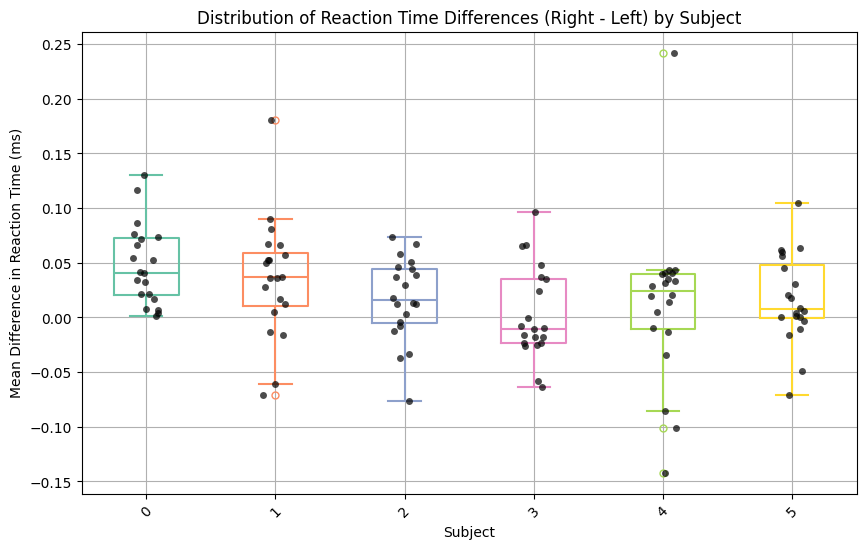

In [202]:
valid_data_right_joined = pd.concat([valid_S11_data_right, valid_S12_data_right, valid_S13_data_right, valid_S14_data_right, valid_S15_data_right, valid_S16_data_right], axis=0)
valid_data_left_joined = pd.concat([valid_S11_data_left, valid_S12_data_left, valid_S13_data_left, valid_S14_data_left, valid_S15_data_left, valid_S16_data_left], axis=0)
diff_data_joined = pd.concat([diff_S11_data, diff_S12_data, diff_S13_data, diff_S14_data, diff_S15_data, diff_S16_data ], axis=1)

#plot distribution of differences per subject in a boxplot with all points shown
plt.figure(figsize=(10, 6))
sns.boxplot(data=diff_data_joined, palette="Set2", fliersize=5, width=0.5, fill=False, linewidth=1.5)
sns.stripplot(data=diff_data_joined, color='black', alpha=0.7, jitter=True, size=5)
plt.title('Distribution of Reaction Time Differences (Right - Left) by Subject')
plt.xlabel('Subject')
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xticks(rotation=45)
plt.grid(True)


C:\Users\defon\AppData\Local\Temp\ipykernel_29312\2659742020.py:11: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='ID', y='RT', hue='Side', data=combined_df, color='black', dodge=True, alpha=1, jitter=True, size=3)


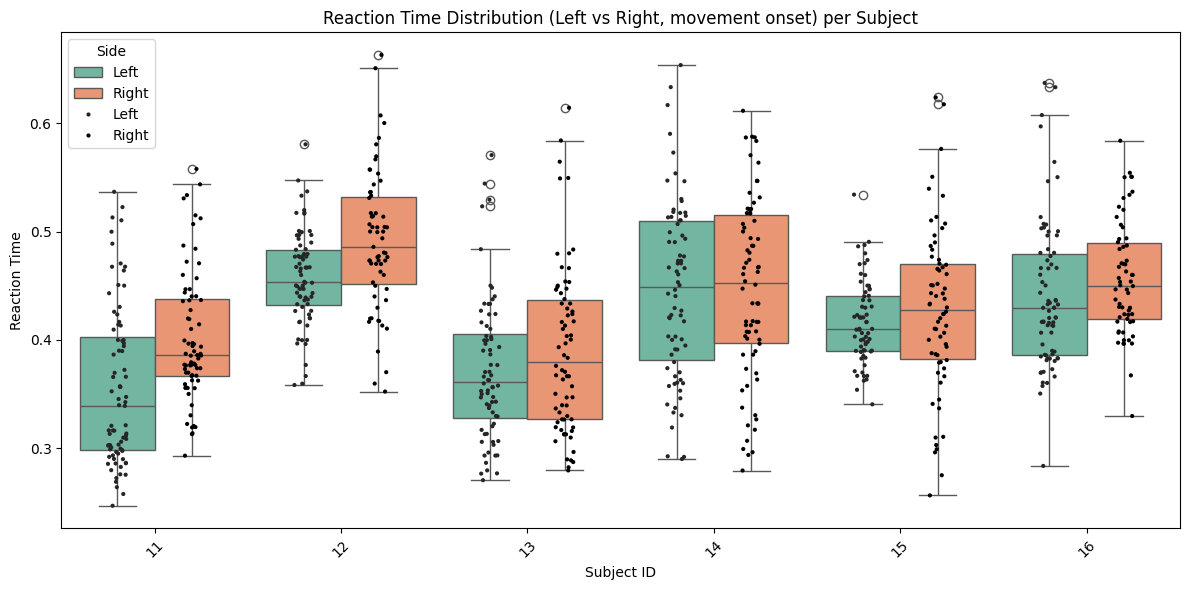

In [203]:
right_df = valid_data_right_joined[['ID', 'RT_start_right']].rename(columns={'RT_start_right': 'RT'})
right_df['Side'] = 'Right'

left_df = valid_data_left_joined[['ID', 'RT_start_left']].rename(columns={'RT_start_left': 'RT'})
left_df['Side'] = 'Left'

combined_df = pd.concat([left_df, right_df], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='ID', y='RT', hue='Side', data=combined_df, palette='Set2')
sns.stripplot(x='ID', y='RT', hue='Side', data=combined_df, color='black', dodge=True, alpha=1, jitter=True, size=3)


plt.title('Reaction Time Distribution (Left vs Right, movement onset) per Subject')
plt.xlabel('Subject ID')
plt.ylabel('Reaction Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Side')
plt.show()


C:\Users\defon\AppData\Local\Temp\ipykernel_29312\1351799174.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x=1, y='RT', hue='Side', data=combined_df, color='black', dodge=True, alpha=1, jitter=True, size=3)


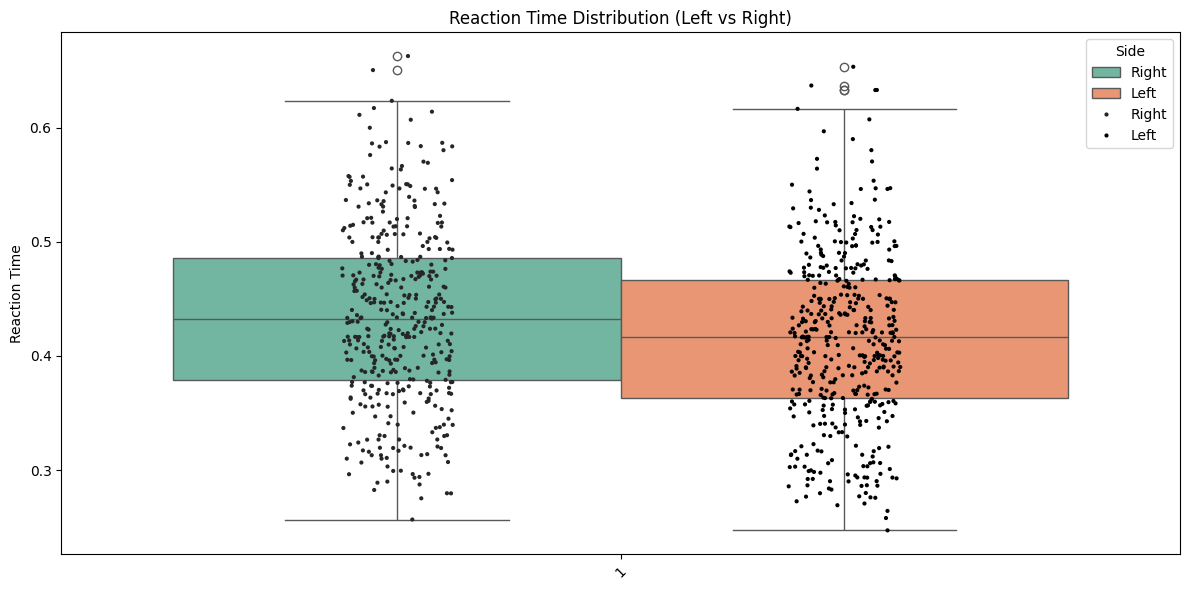

In [204]:
right_df = valid_data_right_joined[['RT_start_right']].rename(columns={'RT_start_right': 'RT'})
right_df['Side'] = 'Right'

left_df = valid_data_left_joined[['RT_start_left']].rename(columns={'RT_start_left': 'RT'})
left_df['Side'] = 'Left'

combined_df = pd.concat([right_df, left_df], ignore_index=True)

# Now plot using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x=1, y='RT', hue='Side', data=combined_df, palette='Set2')
sns.stripplot(x=1, y='RT', hue='Side', data=combined_df, color='black', dodge=True, alpha=1, jitter=True, size=3)

# Customizing the plot
plt.title('Reaction Time Distribution (Left vs Right)')
plt.ylabel('Reaction Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Side')
plt.show()


## Statistical comparison

In [206]:
stats.ttest_ind(valid_data_right_joined['RT_start_right'], valid_data_left_joined['RT_start_left'], equal_var=False)

TtestResult(statistic=3.9908419841702845, pvalue=7.163087006350294e-05, df=834.3335771845688)

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\2535952350.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=1, y=mean_diff, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)
C:\Users\defon\AppData\Local\Temp\ipykernel_29312\2535952350.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=1, y=mean_diff, palette='Set2')


Text(0.5, 0, 'Subject ID')

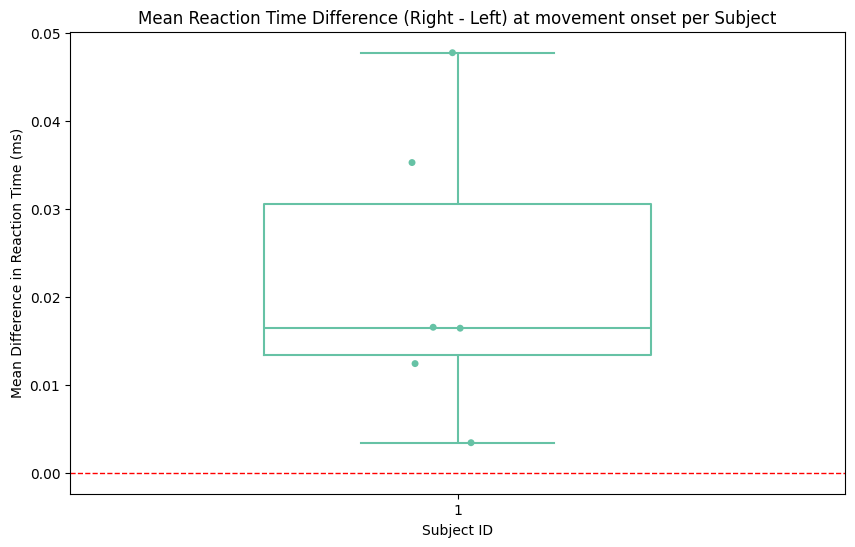

In [210]:
#Compute the mean RT diff between right and left per subject 

mean_diff = diff_data_joined.mean(axis=0)

# plot the mean RT diff per subject
plt.figure(figsize=(10, 6))
sns.boxplot(x=1, y=mean_diff, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)
sns.stripplot(x=1, y=mean_diff, palette='Set2')

plt.title('Mean Reaction Time Difference (Right - Left) at movement onset per Subject')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xlabel('Subject ID')



In [209]:
stats.ttest_1samp(mean_diff, 0)

TtestResult(statistic=3.290102576086594, pvalue=0.021711062790773304, df=5)

## RT end

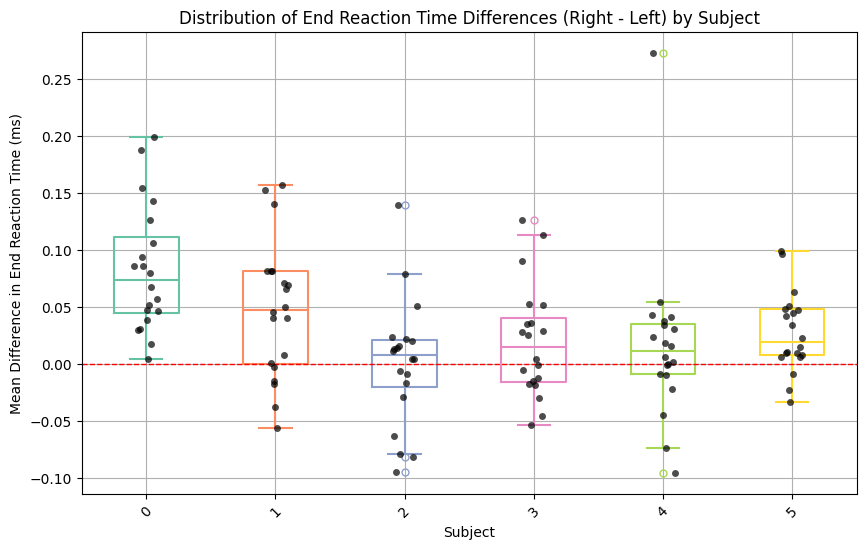

In [176]:
valid_data_RT_end_right_joined = pd.concat([valid_S11_RT_end_data_right, valid_S12_RT_end_data_right, valid_S13_RT_end_data_right, valid_S14_RT_end_data_right, valid_S15_RT_end_data_right, valid_S16_RT_end_data_right], axis=0)
valid_data_RT_end_left_joined = pd.concat([valid_S11_RT_end_data_left, valid_S12_RT_end_data_left, valid_S13_RT_end_data_left, valid_S14_RT_end_data_left, valid_S15_RT_end_data_left, valid_S16_RT_end_data_left], axis=0)
diff_RT_end_data_joined = pd.concat([diff_S11_RT_end_data, diff_S12_RT_end_data, diff_S13_RT_end_data, diff_S14_RT_end_data, diff_S15_RT_end_data, diff_S16_RT_end_data], axis=1)   
#plot distribution of differences per subject in a boxplot with all points shown
plt.figure(figsize=(10, 6))
sns.boxplot(data=diff_RT_end_data_joined, palette="Set2", fliersize=5, width=0.5, fill=False, linewidth=1.5)
sns.stripplot(data=diff_RT_end_data_joined, color='black', alpha=0.7, jitter=True, size=5)
plt.title('Distribution of End Reaction Time Differences (Right - Left) by Subject')    
plt.xlabel('Subject')
plt.ylabel('Mean Difference in End Reaction Time (ms)')
plt.xticks(rotation=45) 
plt.grid(True)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\1868408511.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='ID', y='RT', hue='Side', data=combined_df_end, color='black', dodge=True, alpha=1, jitter=True, size=3)


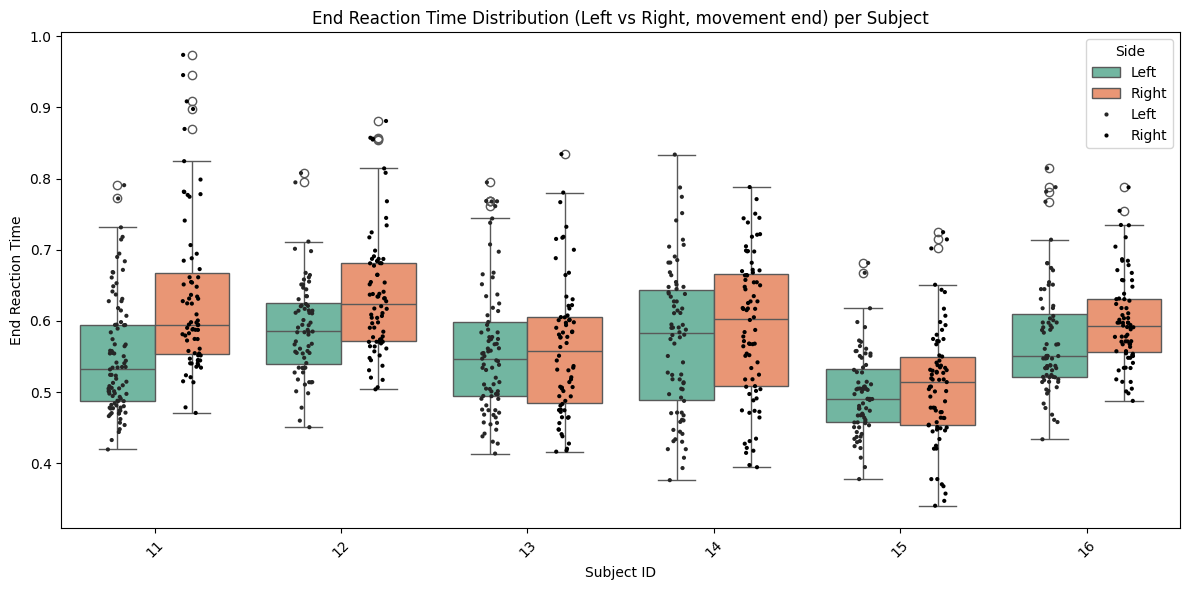

In [177]:
right_df_end = valid_data_RT_end_right_joined[['ID','RT_end_right']].rename(columns={'RT_end_right': 'RT'})
right_df_end['Side'] = 'Right'

left_df_end = valid_data_RT_end_left_joined[['ID','RT_end_left']].rename(columns={'RT_end_left': 'RT'})
left_df_end['Side'] = 'Left'

combined_df_end = pd.concat([left_df_end, right_df_end], ignore_index=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='ID', y='RT', hue='Side', data=combined_df_end, palette='Set2')
sns.stripplot(x='ID', y='RT', hue='Side', data=combined_df_end, color='black', dodge=True, alpha=1, jitter=True, size=3)    
plt.title('End Reaction Time Distribution (Left vs Right, movement end) per Subject')
plt.xlabel('Subject ID')
plt.ylabel('End Reaction Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Side')
plt.show()

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\106938790.py:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x=1, y='RT', hue='Side', data=combined_df_end, color='black', dodge=True, alpha=1, jitter=True, size=3)


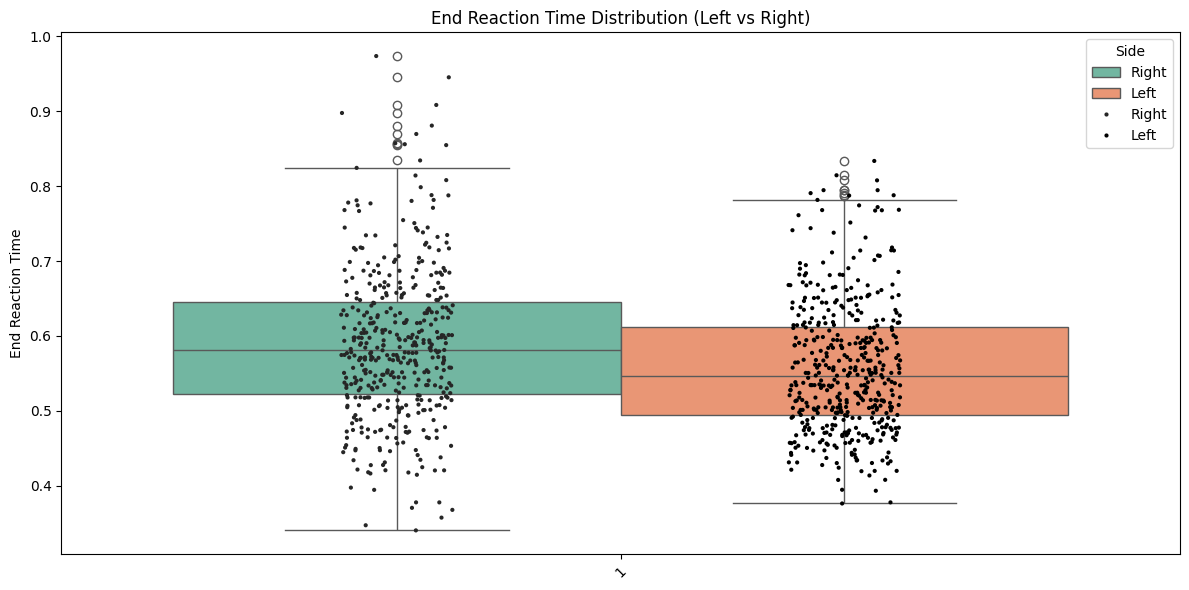

In [179]:
right_df_end = valid_data_RT_end_right_joined[['RT_end_right']].rename(columns={'RT_end_right': 'RT'})
right_df_end['Side'] = 'Right'

left_df_end = valid_data_RT_end_left_joined[['RT_end_left']].rename(columns={'RT_end_left': 'RT'})
left_df_end['Side'] = 'Left'

combined_df_end = pd.concat([right_df_end, left_df_end], ignore_index=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x=1, y='RT', hue='Side', data=combined_df_end, palette='Set2')
sns.stripplot(x=1, y='RT', hue='Side', data=combined_df_end, color='black', dodge=True, alpha=1, jitter=True, size=3)   
# Customizing the plot
plt.title('End Reaction Time Distribution (Left vs Right)')
plt.ylabel('End Reaction Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Side')
plt.show()

## Statistical comparison

In [180]:
stats.ttest_ind(valid_data_RT_end_right_joined['RT_end_right'], valid_data_RT_end_left_joined['RT_end_left'], equal_var=False)

TtestResult(statistic=4.955287356771852, pvalue=8.717149030386161e-07, df=849.5347884041861)

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\575445457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=1, y=mean_diff, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)


Text(0.5, 0, 'Subject ID')

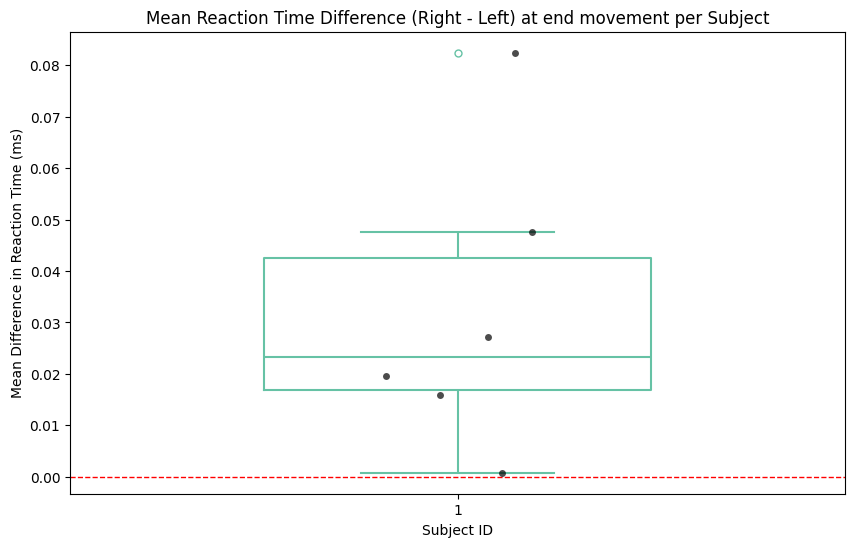

In [181]:
#Compute the mean RT diff between right and left per subject 

mean_diff = diff_RT_end_data_joined.mean(axis=0)

# plot the mean RT diff per subject
plt.figure(figsize=(10, 6))
sns.boxplot(x=1, y=mean_diff, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)
sns.stripplot(x=1, y=mean_diff, color='black', alpha=0.7, jitter=True, size=5)
plt.xlabel('Subject ID')
plt.title('Mean Reaction Time Difference (Right - Left) at end movement per Subject')
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xlabel('Subject ID')


In [182]:
stats.ttest_1samp(mean_diff, 0)

TtestResult(statistic=2.7258347679373935, pvalue=0.04148552889570718, df=5)

## Stats excluding S14

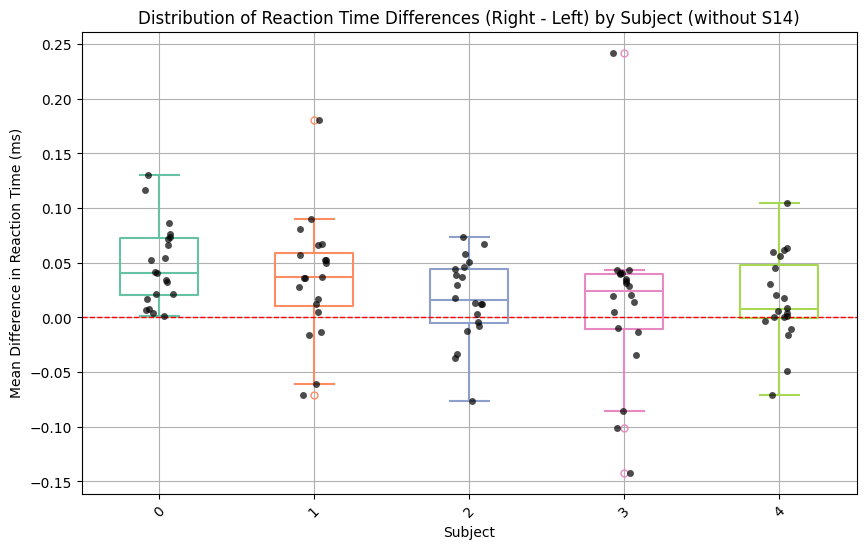

In [ ]:
# perform same analysis without S14
valid_data_right_joined_no_S14 = pd.concat([valid_S11_data_right, valid_S12_data_right, valid_S13_data_right, valid_S15_data_right, valid_S16_data_right], axis=0)
valid_data_left_joined_no_S14 = pd.concat([valid_S11_data_left, valid_S12_data_left, valid_S13_data_left, valid_S15_data_left, valid_S16_data_left], axis=0)
diff_data_joined_no_S14 = pd.concat([diff_S11_data, diff_S12_data, diff_S13_data, diff_S15_data, diff_S16_data], axis=1)


C:\Users\defon\AppData\Local\Temp\ipykernel_29312\3647899241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=1, y=mean_diff_no_S14, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)


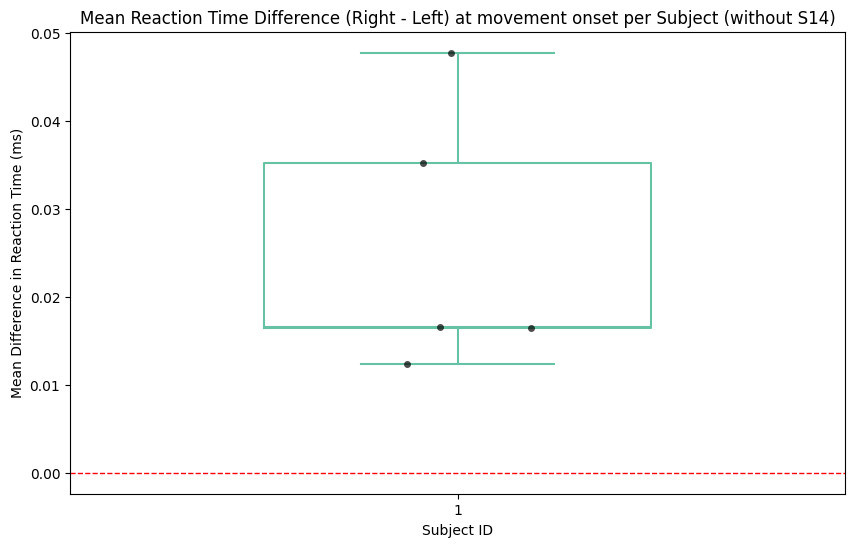

In [ ]:
mean_diff_no_S14 = diff_data_joined_no_S14.mean(axis=0)
# plot the mean RT diff per subject without S14
plt.figure(figsize=(10, 6))
sns.boxplot(x=1, y=mean_diff_no_S14, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)
sns.stripplot(x=1, y=mean_diff_no_S14, color='black', alpha=0.7, jitter=True, size=5)
plt.title('Mean Reaction Time Difference (Right - Left) at movement onset per Subject (without S14)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xlabel('Subject ID')

# perform same analysis without S14 for RT end
valid_data_RT_end_right_joined_no_S14 = pd.concat([valid_S11_RT_end_data_right, valid_S12_RT_end_data_right, valid_S13_RT_end_data_right, valid_S15_RT_end_data_right, valid_S16_RT_end_data_right], axis=0)
valid_data_RT_end_left_joined_no_S14 = pd.concat([valid_S11_RT_end_data_left, valid_S12_RT_end_data_left, valid_S13_RT_end_data_left, valid_S15_RT_end_data_left, valid_S16_RT_end_data_left], axis=0)
diff_RT_end_data_joined_no_S14 = pd.concat([diff_S11_RT_end_data, diff_S12_RT_end_data, diff_S13_RT_end_data, diff_S15_RT_end_data, diff_S16_RT_end_data], axis=1)  
#plot distribution of differences per subject in a boxplot with all points shown
              

In [186]:
stats.ttest_1samp(mean_diff_no_S14, 0)


TtestResult(statistic=3.7772886092900295, pvalue=0.01948136487709446, df=4)

In [187]:
# perform same analysis without S14 for RT end
valid_data_RT_end_right_joined_no_S14 = pd.concat([valid_S11_RT_end_data_right, valid_S12_RT_end_data_right, valid_S13_RT_end_data_right, valid_S15_RT_end_data_right, valid_S16_RT_end_data_right], axis=0)
valid_data_RT_end_left_joined_no_S14 = pd.concat([valid_S11_RT_end_data_left, valid_S12_RT_end_data_left, valid_S13_RT_end_data_left, valid_S15_RT_end_data_left, valid_S16_RT_end_data_left], axis=0)
diff_RT_end_data_joined_no_S14 = pd.concat([diff_S11_RT_end_data, diff_S12_RT_end_data, diff_S13_RT_end_data, diff_S15_RT_end_data, diff_S16_RT_end_data], axis=1) 

C:\Users\defon\AppData\Local\Temp\ipykernel_29312\1299638471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=1, y=meaan_diff_RT_end_no_S14, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)


Text(0.5, 0, 'Subject ID')

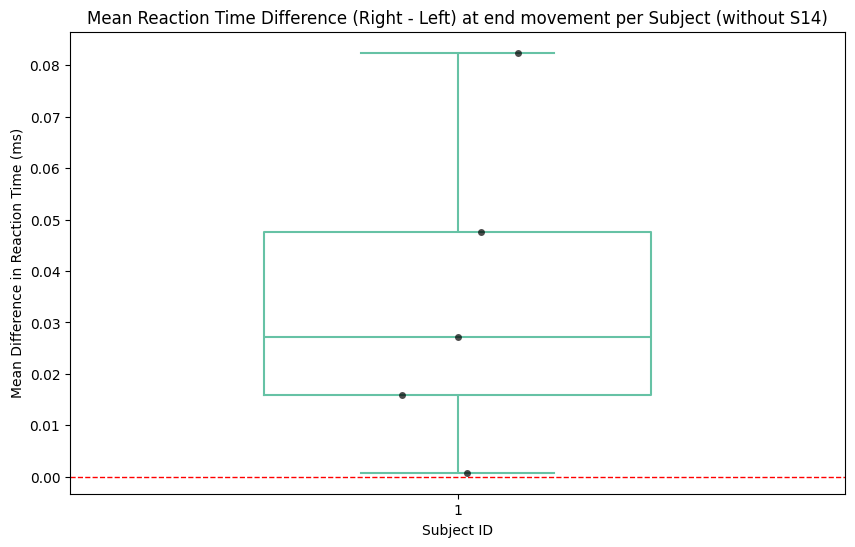

In [188]:
meaan_diff_RT_end_no_S14 = diff_RT_end_data_joined_no_S14.mean(axis=0)
# plot the mean RT diff per subject without S14
plt.figure(figsize=(10, 6))
sns.boxplot(x=1, y=meaan_diff_RT_end_no_S14, palette='Set2', fliersize=5, width=0.5, fill=False, linewidth=1.5)
sns.stripplot(x=1, y=meaan_diff_RT_end_no_S14, color='black', alpha=0.7, jitter=True, size=5)
plt.title('Mean Reaction Time Difference (Right - Left) at end movement per Subject (without S14)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)    
plt.ylabel('Mean Difference in Reaction Time (ms)')
plt.xlabel('Subject ID')



In [189]:
stats.ttest_1samp(meaan_diff_RT_end_no_S14, 0)

TtestResult(statistic=2.4594560159232888, pvalue=0.06973220627326422, df=4)